In [1]:
import soil
import networkx as nx
import numpy
%pylab inline

from soil import *
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sbn

sbn.set_context("talk", font_scale=1)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = analysis.read_csv('soil_output/Malasana_20/Malasana_20_trial_0.environment.csv', keys=None, convert_types=False)
data_fights = data['num_of_fights']

data_2 = analysis.read_csv('soil_output/Malasana/Malasana_trial_0.environment.csv',keys=None, convert_types=False)
data_fights_2 = data_2['num_of_fights']

In [3]:
data_fights
#data_fights_2

agent_id,0,1,10,11,12,13,14,15,16,17,...,36,37,38,39,4,5,6,7,8,9
t_step,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Ver número total de peleas
num_fights=0

for column in data_fights:
    #print('Columna: {}'.format(column))
    for index, row in data_fights.iterrows():
        if row[column]=='1':
            num_fights+=0.5
            break
            
            
print(num_fights)


num_fights_2=0

for column in data_fights_2:
    #print('Columna: {}'.format(column))
    for index, row in data_fights_2.iterrows():
        #print('######## PASO {} ######'.format(index))
        if row[column]=='1':
            num_fights_2+=0.5
            break
            
            
print(num_fights_2)



3.0
81.5


In [5]:
#Ver numero de peleas y como sube por cada paso

fights_step = []


for index, row in data_fights.iterrows():
    #print('Fila: {}'.format(row))
    #print('*********************************** PASO {} ************************************************************'.format(index))
    
   
    n=0
    for column in data_fights:
        #print('Agent_id: {}'.format(column)) #Column es agent_id
        
        #print('Column: {}'.format(column))
        #print('Número de peleas: {}'.format(row[column]))
        
        if row[column] == '1':
            n+=0.5
            
        #print('n vale: {}'.format(n))
        #print('-----------------------------------------------')
    
    
    fights_step.insert(index,int(n))


for inte in range(len(fights_step),38):
    fights_step.insert(inte, fights_step[len(fights_step)-1])

print(fights_step)






fights_step_2 = []

for index, row in data_fights_2.iterrows():
    #print('Fila: {}'.format(row))
    #print('*********************************** PASO {} ************************************************************'.format(index))
    
   
    n=0
    for column in data_fights_2:
        #print('Agent_id: {}'.format(column)) #Column es agent_id
        
        #print('Column: {}'.format(column))
        #print('Número de peleas: {}'.format(row[column]))
        
        if row[column] == '1':
            n+=0.5
        #print('n vale: {}'.format(n))
        #print('-----------------------------------------------')
    
    
    fights_step_2.insert(index,int(n))
   
    

for inte in range(len(fights_step_2),38):
    fights_step_2.insert(inte, fights_step_2[len(fights_step_2)-1])

print(fights_step_2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 3, 6, 13, 15, 21, 29, 38, 47, 55, 58, 65, 70, 72, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]


In [6]:
fights_step_df = pd.DataFrame(fights_step, columns = ['Num_fights']) 
fights_step_df 

fights_step_df_2 = pd.DataFrame(fights_step_2, columns = ['Num_fights']) 
fights_step_df_2 

,Num_fights
0,0
1,0
2,0
3,3
4,6
5,13
6,15
7,21
8,29
9,38


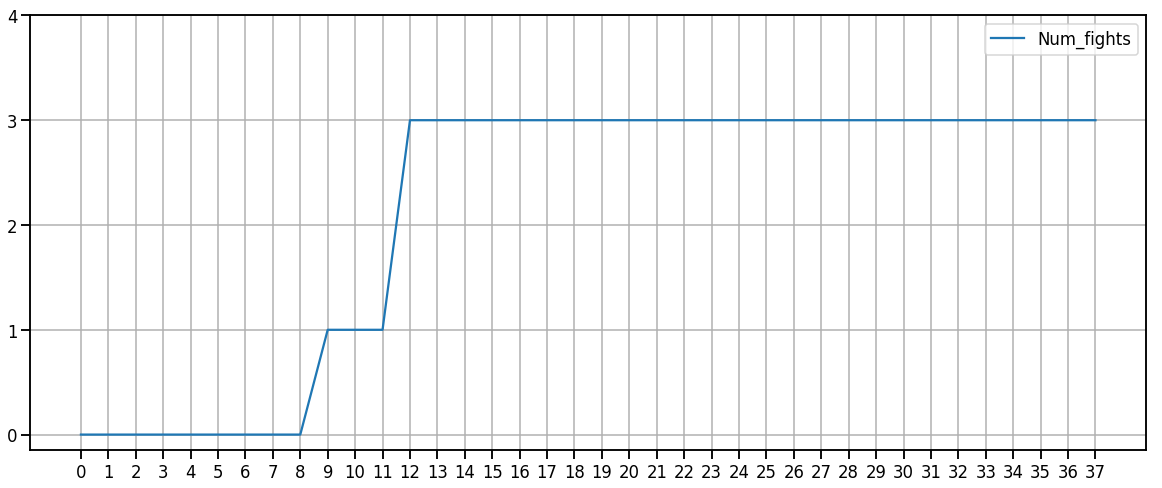

<Figure size 432x288 with 0 Axes>

In [7]:
fig = fights_step_df.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_fights+2, 1)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

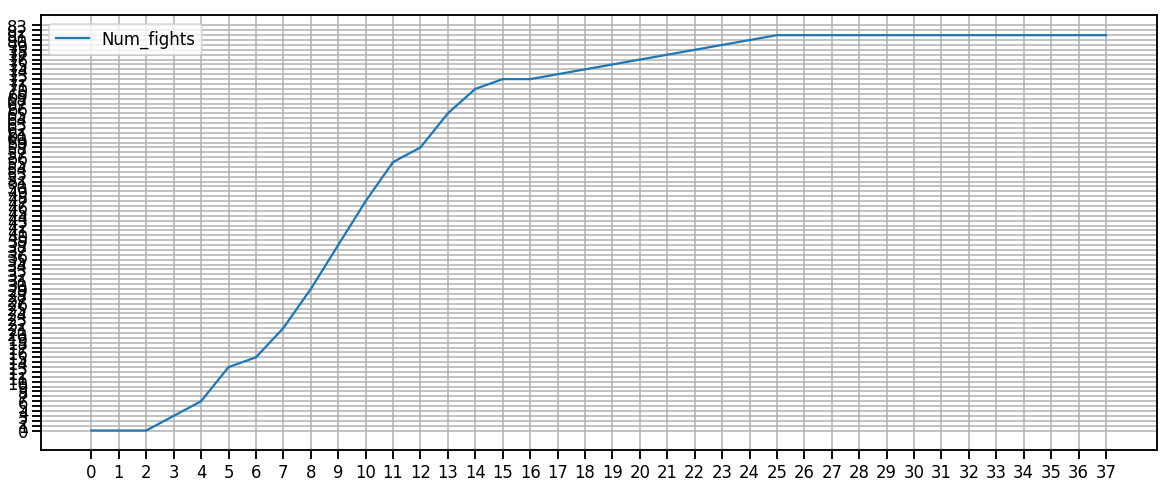

<Figure size 432x288 with 0 Axes>

In [8]:
fig = fights_step_df_2.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_fights_2+2, 1)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()


In [9]:
'''sbn.plt.rcParams["figure.figsize"] = (20,25)
sbn.plt.subplot(421)
sbn.regplot(x=data[0], y=np.array(fights_step), scatter=True, order=2)'''

'sbn.plt.rcParams["figure.figsize"] = (20,25)\nsbn.plt.subplot(421)\nsbn.regplot(x=data[0], y=np.array(fights_step), scatter=True, order=2)'

In [10]:
data_drunk_2 = data_2['drunk']
data_drunk_2

data_drunk = data['drunk']
data_drunk



agent_id,0,1,10,11,12,13,14,15,16,17,...,36,37,38,39,4,5,6,7,8,9
t_step,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Ver número total de borrachos
num_drunks=0

for column in data_drunk:
    #print('Columna: {}'.format(column))
    for index, row in data_drunk.iterrows():
        if row[column]=='True':
            num_drunks+=1
            break
            
            
print(num_drunks)


num_drunks_2=0

for column in data_drunk_2:
    #print('Columna: {}'.format(column))
    for index, row in data_drunk_2.iterrows():
        if row[column]=='True':
            num_drunks_2+=1
            break
            
            
print(num_drunks_2)

2
56


In [12]:
#Ver borrachos por paso
drunks_step = []

for index, row in data_drunk.iterrows():
    #print('Fila: {}'.format(row))
    #print('*********************************** PASO {} ************************************************************'.format(index))
    
   
    n=0
    for column in data_drunk:
        #print('Agent_id: {}'.format(column)) #Column es agent_id
        
        #print('Column: {}'.format(column))
        #print('EStoy borracho: {}'.format(row[column]))
        
        if row[column] == 'True':
            n+=1
        #print('n vale: {}'.format(n))
        #print('-----------------------------------------------')
    
    
    drunks_step.insert(index,int(n))
    
del drunks_step[len(data_drunk):len(drunks_step)]


for inte in range(len(drunks_step),38):
    drunks_step.insert(inte, drunks_step[len(drunks_step)-1])


print(drunks_step)
#len(drunk_step)


drunks_step_2 = []

for index, row in data_drunk_2.iterrows():
    #print('Fila: {}'.format(row))
    #print('*********************************** PASO {} ************************************************************'.format(index))
    
   
    n=0
    for column in data_drunk_2:
        #print('Agent_id: {}'.format(column)) #Column es agent_id
        
        #print('Column: {}'.format(column))
        #print('EStoy borracho: {}'.format(row[column]))
        
        if row[column] == 'True':
            n+=1
        #print('n vale: {}'.format(n))
        #print('-----------------------------------------------')
    
    
    drunks_step_2.insert(index,int(n))
    
del drunks_step_2[len(data_drunk_2):len(drunks_step_2)]

for inte in range(len(drunks_step_2),38):
    drunks_step_2.insert(inte, drunks_step_2[len(drunks_step_2)-1])


print(drunks_step_2)
#len(drunk_step)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 10, 16, 20, 26, 32, 35, 40, 41, 43, 43, 45, 46, 46, 47, 48, 49, 52, 53, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]


In [13]:
drunks_step_df = pd.DataFrame(drunks_step, columns = ['Num_drunks']) 
drunks_step_df 

drunks_step_df_2 = pd.DataFrame(drunks_step_2, columns = ['Num_drunks']) 
drunks_step_df_2

,Num_drunks
0,0
1,0
2,0
3,0
4,0
5,10
6,16
7,20
8,26
9,32


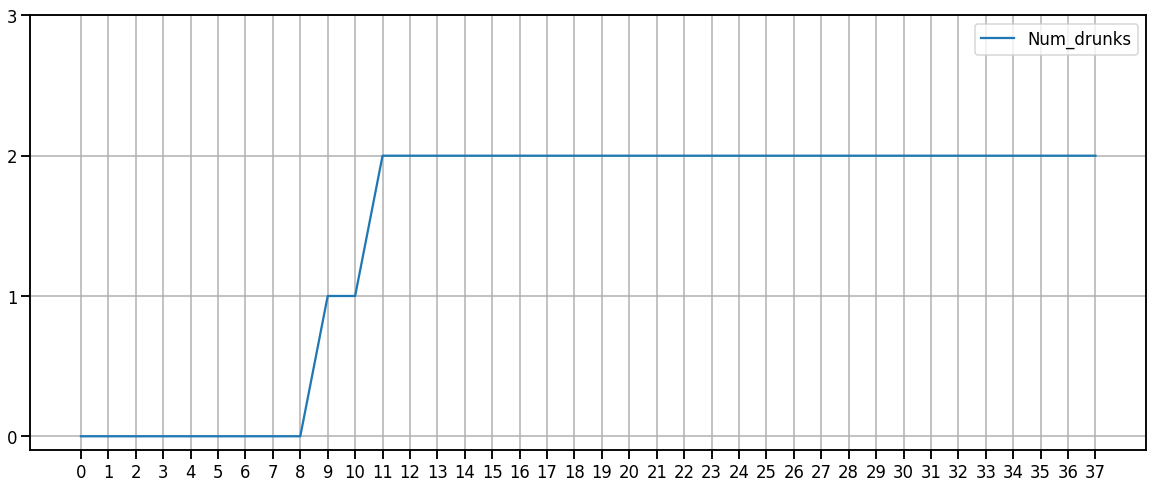

<Figure size 432x288 with 0 Axes>

In [14]:
fig = drunks_step_df.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_drunks+2, 1)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

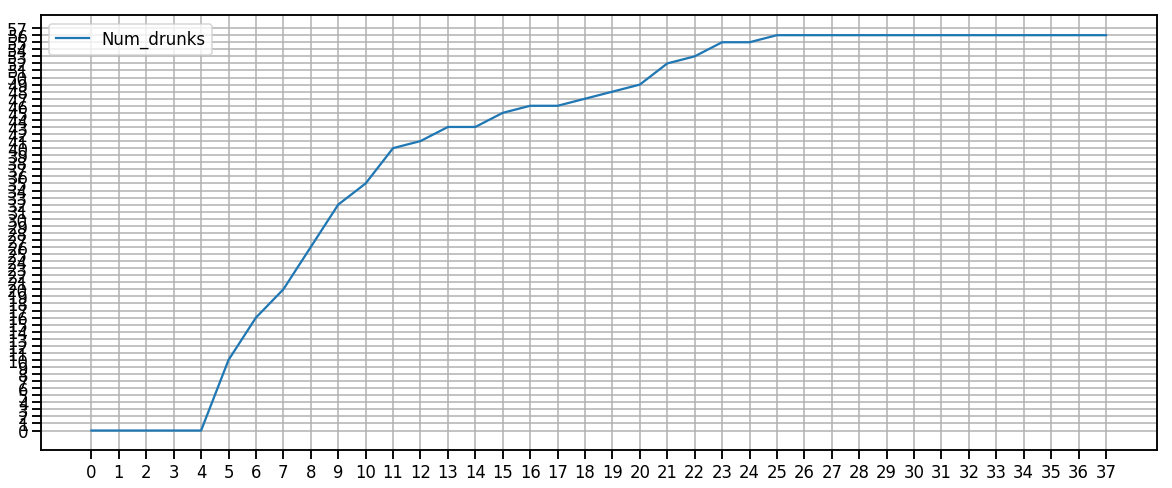

<Figure size 432x288 with 0 Axes>

In [15]:
fig = drunks_step_df_2.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_drunks_2+2, 1)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

In [16]:
data_intoxicate_2 = data_2['intoxicated']
data_intoxicate_2

data_intoxicate = data['intoxicated']
data_intoxicate


agent_id,0,1,10,11,12,13,14,15,16,17,...,36,37,38,39,4,5,6,7,8,9
t_step,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#Numero total de intoxicados
num_intoxicates=0

for column in data_intoxicate:
    #print('Columna: {}'.format(column))
    for index, row in data_intoxicate.iterrows():
        if row[column]=='True':
            num_intoxicates+=1
            break
            
            
print(num_intoxicates)


num_intoxicates_2=0

for column in data_intoxicate_2:
    #print('Columna: {}'.format(column))
    for index, row in data_intoxicate_2.iterrows():
        if row[column]=='True':
            num_intoxicates_2+=1
            break
            
            
print(num_intoxicates)

0
0


In [18]:
#Intoxicados por cada paso

intoxicates_step = []

for index, row in data_intoxicate.iterrows():
    #print('Fila: {}'.format(row))
    #print('*********************************** PASO {} ************************************************************'.format(index))
    
   
    n=0
    for column in data_intoxicate:
        #print('Agent_id: {}'.format(column)) #Column es agent_id
        
        #print('Column: {}'.format(column))
        #print('EStoy borracho: {}'.format(row[column]))
        
        if row[column] == 'True':
            n+=1
        #print('n vale: {}'.format(n))
        #print('-----------------------------------------------')
    
    
    intoxicates_step.insert(index,int(n))
    
del intoxicates_step[len(data_intoxicate):len(intoxicates_step)]
    
for inte in range(len(intoxicates_step),38):
    intoxicates_step.insert(inte, intoxicates_step[len(intoxicates_step)-1])
    
print(intoxicates_step)
#len(drunk_step)


intoxicates_step_2 = []

for index, row in data_intoxicate_2.iterrows():
    #print('Fila: {}'.format(row))
    #print('*********************************** PASO {} ************************************************************'.format(index))
    
   
    n=0
    for column in data_intoxicate_2:
        #print('Agent_id: {}'.format(column)) #Column es agent_id
        
        #print('Column: {}'.format(column))
        #print('EStoy borracho: {}'.format(row[column]))
        
        if row[column] == 'True':
            n+=1
        #print('n vale: {}'.format(n))
        #print('-----------------------------------------------')
    
    
    intoxicates_step_2.insert(index,int(n))
    
del intoxicates_step_2[len(data_intoxicate_2):len(intoxicates_step_2)]


for inte in range(len(intoxicates_step_2),38):
    intoxicates_step_2.insert(inte, intoxicates_step_2[len(intoxicates_step_2)-1])
    
print(intoxicates_step_2)
#len(drunk_step)




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
intoxicates_step_df = pd.DataFrame(intoxicates_step, columns = ['Num_intoxicates']) 
intoxicates_step_df 

intoxicates_step_df_2 = pd.DataFrame(intoxicates_step_2, columns = ['Num_intoxicates']) 
intoxicates_step_df_2 

,Num_intoxicates
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


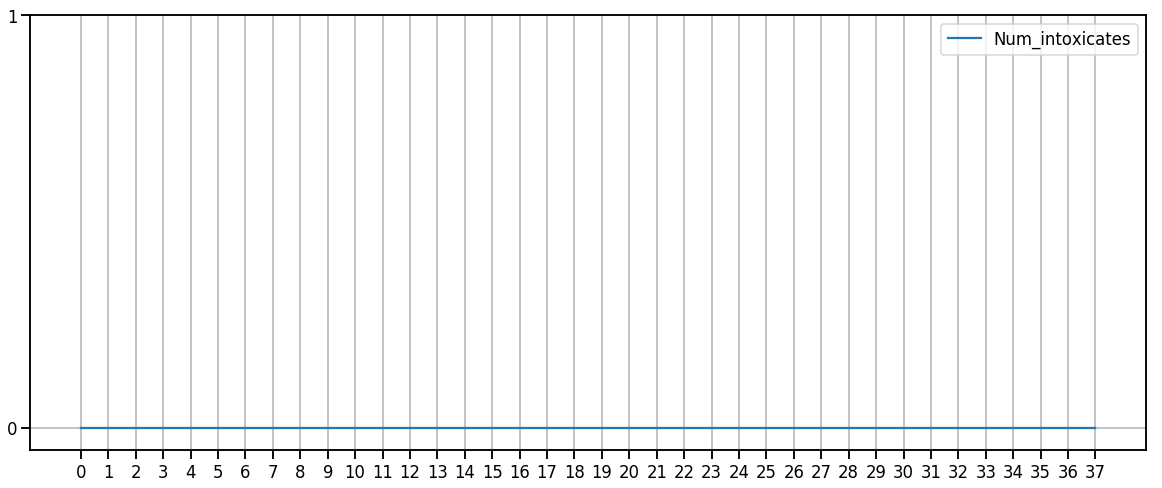

<Figure size 432x288 with 0 Axes>

In [20]:
fig = intoxicates_step_df.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_intoxicates+2, 1)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

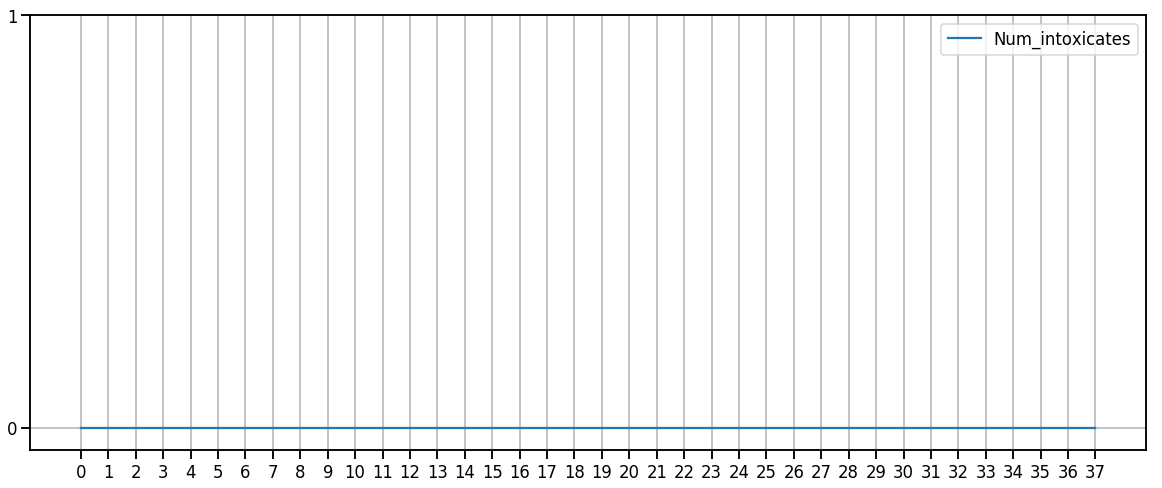

<Figure size 432x288 with 0 Axes>

In [21]:
fig = intoxicates_step_df_2.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_intoxicates+2, 1)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()